### 1.1. Importing packages

In [1]:
from scipy import misc
import matplotlib.pyplot as plt

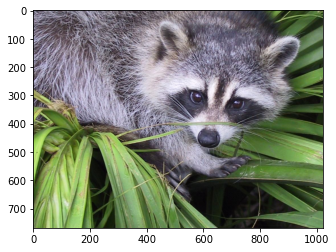

In [2]:
face = misc.face()
plt.imshow(face)
plt.show()

### 1.2. Chaotic difference equation example

In [3]:
import matplotlib.pyplot as plt

In [4]:
def chaos(r,xn):
    return r * xn * (1-xn)

In [5]:
# variables
r=2
x0=0.1

In [6]:
n = 100

#### r=2

In [7]:
x0=0.1
final_list = [x0]
for i in range(n):
    x0 = chaos(r,x0)
    final_list.append(x0)

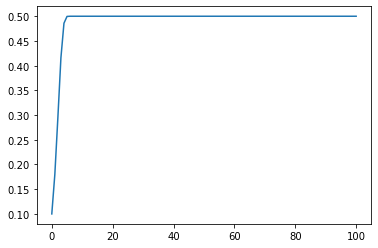

In [8]:
plt.plot(final_list)

#### r=2.5

In [9]:
r=2.5
x0=0.1

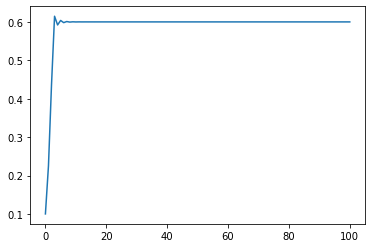

In [10]:
final_list = [x0]
for i in range(n):
    x0 = chaos(r,x0)
    final_list.append(x0)
plt.plot(final_list)

#### r=2.8

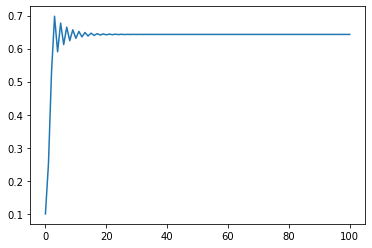

In [11]:
x0=0.1
r=2.8
final_list = [x0]
for i in range(n):
    x0 = chaos(r,x0)
    final_list.append(x0)
plt.plot(final_list)

#### r=3.

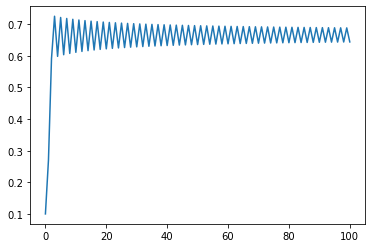

In [12]:
x0=0.1
r=3.
final_list = [x0]
for i in range(100):
    x0 = chaos(r,x0)
    final_list.append(x0)

plt.plot(final_list)

#### r=3.3

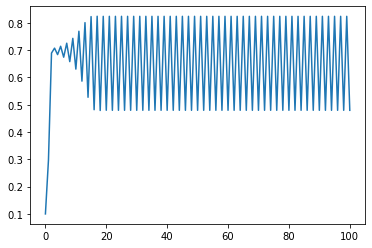

In [13]:
x0=0.1
r=3.3
final_list = [x0]
for i in range(100):
    x0 = chaos(r,x0)
    final_list.append(x0)

plt.plot(final_list)

#### r=3.5

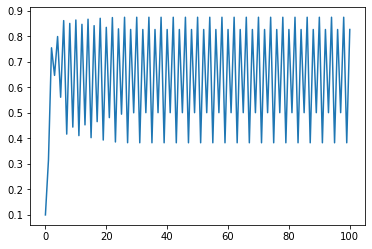

In [14]:
x0=0.1
r=3.5
final_list = [x0]
for i in range(100):
    x0 = chaos(r,x0)
    final_list.append(x0)

plt.plot(final_list)

#### r=4.0

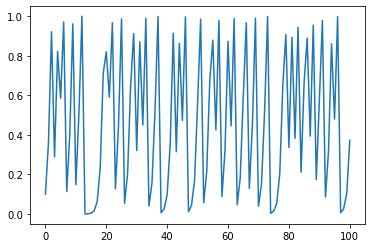

In [15]:
x0=0.1
r=4.0
final_list = [x0]
for i in range(100):
    x0 = chaos(r,x0)
    final_list.append(x0)

plt.plot(final_list)

### 1.3. ODE Example

In [16]:
def dy_dt(y,t):
    return t - y

In [17]:
import scipy.integrate as sci
import numpy as np

In [18]:
y0 = 1.0
t = np.linspace(0,3,30)

In [19]:
y = sci.odeint(dy_dt, y0, t)

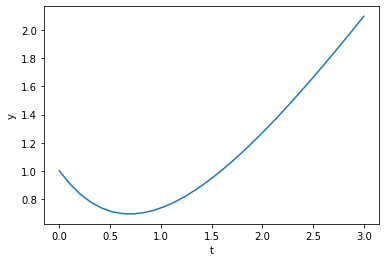

In [20]:
plt.plot(t,y.flatten())
plt.xlabel("t")
plt.ylabel("y")
plt.show()

In [21]:
y_exact = t - 1 + 2 * np.exp(-t)

In [22]:
y_exact

array([1.        , 0.9068936 , 0.83310407, 0.776733  , 0.73606855,
       0.70956712, 0.69583679, 0.69362247, 0.70179239, 0.71932601,
       0.74530309, 0.77889384, 0.81935   , 0.86599685, 0.918226  ,
       0.97548883, 1.03729064, 1.10318535, 1.17277073, 1.24568406,
       1.32159829, 1.40021849, 1.48127873, 1.5645392 , 1.64978368,
       1.73681717, 1.82546387, 1.91556523, 2.00697829, 2.09957414])

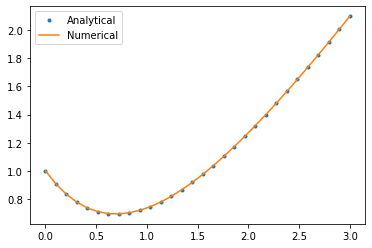

In [23]:
plt.plot(t, y_exact,".", label="Analytical")
plt.plot(t, y,label="Numerical")
plt.legend()
plt.show()

In [24]:
diff = y_exact - y.flatten()

In [25]:
len(diff)

30

In [26]:
diff

array([ 0.00000000e+00, -2.20936942e-08, -1.04747599e-08, -1.89222228e-08,
       -2.79155825e-08, -3.07385867e-08, -3.28044586e-08, -5.36908111e-08,
       -2.29745252e-08, -2.47152306e-08, -1.71658219e-08, -1.59589546e-08,
       -1.40732747e-08, -1.17833546e-08, -1.02491686e-08, -7.89757781e-09,
       -3.39251960e-10,  4.39486425e-09,  6.81157486e-09,  9.81517134e-09,
        1.32513973e-08,  1.41764489e-08,  1.48237629e-08,  1.60960052e-08,
        1.71045875e-08,  1.81424631e-08,  2.19980316e-08,  1.31834950e-08,
        5.59343372e-09, -2.70218958e-10])

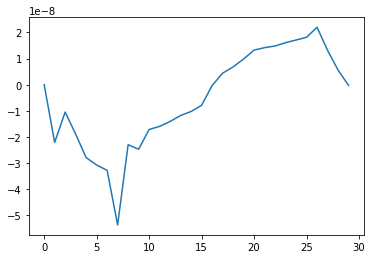

In [27]:
plt.plot(diff)
plt.show()

### 1.4. Projectile motion with air resistance

In [28]:
# define variables and initial values
m = 1.0
k = 0.1
g = 9.81

# the first two values are the position
# the last two values are the speed (horizontal,vertical)
v0 = np.array([0.0, 0.0, 10.0, 10.0])

In [29]:
def f(v, t0, k):
    # v = [u,u']
    u = v[:2]
    udot = v[2:]
    
    # second derivative of u
    udotdot = -k/m * udot
    udotdot[1] = udotdot[1] - g
    
    # v = [u',u'']
    v = np.concatenate([udot,udotdot])
    return v

In [30]:
k=0.1
t = np.linspace(0,3,30)
v = sci.odeint(f,v0,t,args=(k,))
k=0.5
v_k05 = sci.odeint(f,v0,t,args=(k,))
k=1.0
v_k10 = sci.odeint(f,v0,t,args=(k,))

In [31]:
v

array([[  0.        ,   0.        ,  10.        ,  10.        ],
       [  1.02915039,   0.97683986,   9.89708496,   8.88748843],
       [  2.04770927,   1.83918553,   9.79522907,   7.78642627],
       [  3.05578566,   2.58821535,   9.69442143,   6.69669571],
       [  4.05348741,   3.2250955 ,   9.59465126,   5.6181801 ],
       [  5.04092132,   3.75098021,   9.49590787,   4.55076405],
       [  6.01819306,   4.16701177,   9.39818069,   3.49433331],
       [  6.98540719,   4.47432068,   9.30145928,   2.44877483],
       [  7.94266723,   4.67402586,   9.20573328,   1.41397672],
       [  8.89007562,   4.76723474,   9.11099244,   0.38982825],
       [  9.82773377,   4.75504338,   9.01722662,  -0.6237802 ],
       [ 10.75574199,   4.63853646,   8.9244258 ,  -1.62695709],
       [ 11.67419962,   4.41878756,   8.83258004,  -2.61980979],
       [ 12.58320494,   4.09685918,   8.74167951,  -3.60244454],
       [ 13.48285522,   3.67380291,   8.65171448,  -4.5749665 ],
       [ 14.37324676,   3

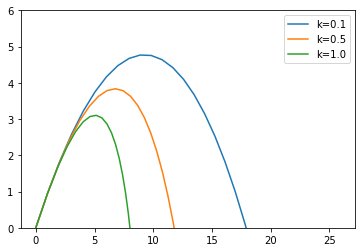

In [32]:
plt.plot(v[:,0],v[:,1],label="k=0.1")
plt.plot(v_k05[:,0],v_k05[:,1],label="k=0.5")
plt.plot(v_k10[:,0],v_k10[:,1],label="k=1.0")
plt.ylim([0,6])
plt.legend()
plt.show()